In [3]:
from math import pi,sin,cos,floor,sqrt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

In [4]:
def rangeByN(min, max, N):
    return [min+(max-min)*x/N for x in range(0,N+1)]

In [5]:
def rangeByStep(min, max, step):
    N = math.floor((max-min)/step)
    return rangeByN(min,max,N)

In [6]:
def length(v: np.array):
    return np.sqrt(v.dot(v))

In [7]:
def unit(v: np.array):
    return v/length(v)

In [8]:
def normal(face):
    return np.cross(face[1]-face[0], face[2]-face[0])

In [9]:
def S(u,v):
    c = a+b*cos(v)
    return np.array([c*cos(u), c*sin(u), b*sin(v)+a*u])

In [10]:
color_map = plt.colormaps.get_cmap('Blues')

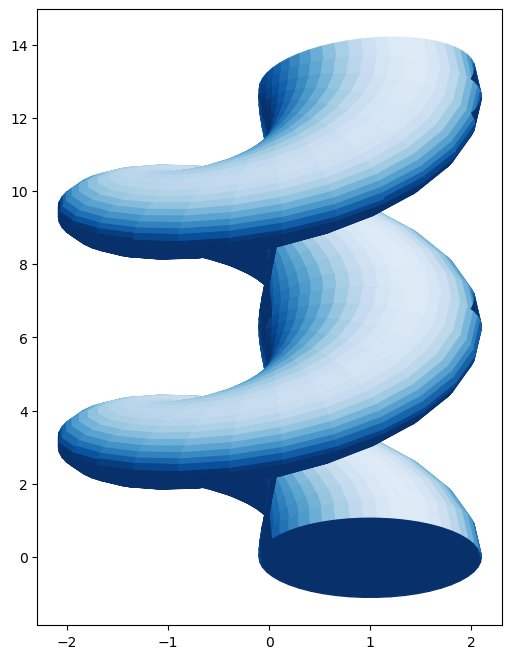

In [11]:
light = np.array([10,-10,100])
camera = [0,-100,6]
projectionMatrix = np.array([[1, 0, 0], [0, 1, 1]])
#projectionMatrix = np.array([[sqrt(3), 0 , -sqrt(3)], [ 1, 2 ,1]])/sqrt(6)

a=1
b=1.1
N=50
N2=50
polygons=[]
fig, ax = plt.subplots(figsize=(6, 8))
for u in rangeByN(0, 4*pi, N):
    for v in rangeByN(0, 2*pi, N2):
        xyz1 = S(u,v)
        xyz2 = S(u+4*pi/N,v)
        xyz3 = S(u+4*pi/N,v+2*pi/N2)
        xyz4 = S(u,v+2*pi/N2)
        
        norm = normal([xyz1,xyz2,xyz4])
        c = color_map(1 - unit(norm).dot(unit(light)))
        p = Polygon([projectionMatrix.dot(xyz1), projectionMatrix.dot(xyz2), projectionMatrix.dot(xyz3), projectionMatrix.dot(xyz4)], color=c)
        polygons.append((p,length(xyz1-camera)))
                        
polygons=sorted(polygons, key=lambda p:-p[1])
for p in polygons:
    ax.add_patch(p[0])

ax.autoscale()
plt.show()

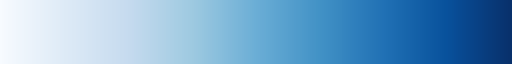

In [12]:
color_map

In [13]:
color_map(1)

(0.9655517108804306, 0.9823452518262207, 0.9990157631680123, 1.0)

In [14]:
color_map(1.5)

(0.03137254901960784, 0.18823529411764706, 0.4196078431372549, 1.0)

In [15]:
color_map(0.5)

(0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0)

In [16]:
color_map(5)

(0.9532487504805844, 0.9744713571703191, 0.9950788158400615, 1.0)

In [17]:
np.array(color_map(1))*256

array([247.18123799, 251.48038447, 255.74803537, 256.        ])

In [18]:
np.array(color_map(0.7))*256

array([ 45.86149942, 126.17522491, 188.26875817, 256.        ])

In [19]:
np.array(color_map(1.2))*256

array([  8.03137255,  48.18823529, 107.41960784, 256.        ])